In [1]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_absolute_error
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 

In [2]:
df = pd.read_csv("./datasets/car_2.0.csv", encoding="utf-8")
Y = df.loc[:]["保值率"]
df = df.drop(["保值率"], axis=1)
X = df.iloc[:, :]

In [3]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, train_size=0.8, random_state=0)
model = XGBRegressor()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
print(mean_absolute_error(Y_train, Y_train_pred))

Y_test_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_test_pred))

0.002907753641632809
0.030760483848808997


In [6]:
error0 = np.abs(Y_test.values - Y_test_pred)
relative_error0 = error0 / Y_test.values

In [7]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, train_size=0.8, random_state=0)

xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

params =  {'n_estimators': [1000, 2000, 3000, 4000]}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'n_estimators': 4000}


In [8]:
xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=4000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

params = {'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'max_depth': 3, 'min_child_weight': 5}


In [9]:
xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=4000,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

params = {'gamma':[i/10.0 for i in range(0,5)]}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'gamma': 0.0}


In [10]:
xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=4000,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

params = {'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'colsample_bytree': 0.9, 'subsample': 0.7}


In [18]:
xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=4000,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.9,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

params = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'reg_alpha': 1e-05}

In [15]:
xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=4000,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.9,
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 reg_alpha=1e-05)
params =  {'n_estimators': [4000, 5000, 6000, 7000]}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'n_estimators': 7000}


In [4]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, train_size=0.8, random_state=0)
model = XGBRegressor(
 learning_rate =0.1,
 n_estimators=7000,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.9,
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 reg_alpha=1e-05)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
print(mean_absolute_error(Y_train, Y_train_pred))

Y_test_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_test_pred))

0.0003744255105890138
0.020341530941498584


In [20]:
error1 = np.abs(Y_test.values - Y_test_pred)
relative_error1 = error1 / Y_test.values

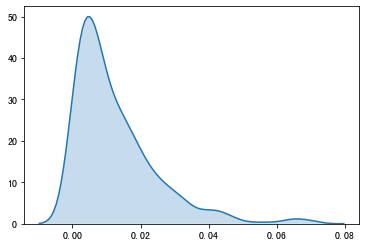

In [28]:
sns.kdeplot(error1, shade=True)
plt.show()

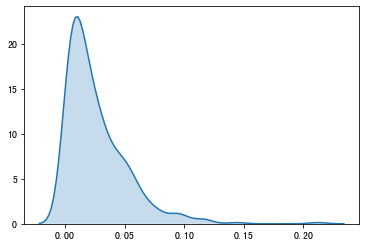

In [29]:
sns.kdeplot(relative_error1, shade=True)
plt.show()

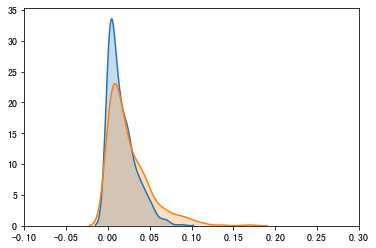

In [23]:
sns.kdeplot(error1, shade=True)
sns.kdeplot(error0, shade=True)
plt.xlim(-0.1, 0.3)
plt.savefig("./images/absolute.png", bpi=300)
plt.show()

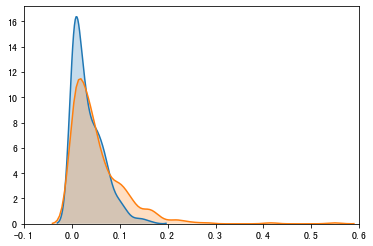

In [24]:
sns.kdeplot(relative_error1, shade=True)
sns.kdeplot(relative_error0, shade=True)
plt.xlim(-0.1, 0.6)
plt.savefig("./images/relative.png", bpi=300)
plt.show()

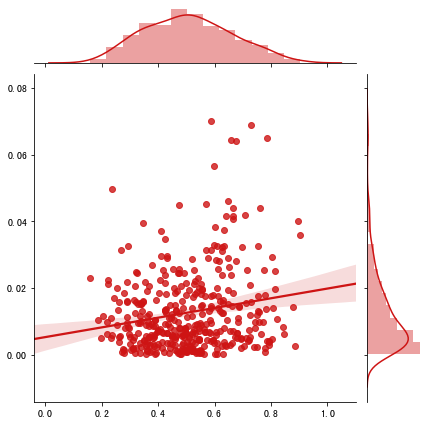

In [37]:
sns.jointplot(Y_test.values, error1, kind="regg", color="#ce1414")

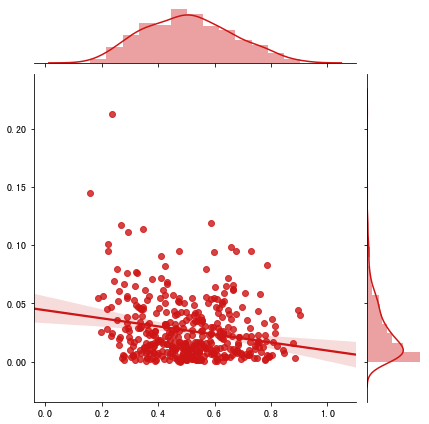

In [38]:
sns.jointplot(Y_test.values, relative_error1, kind="regg", color="#ce1414")

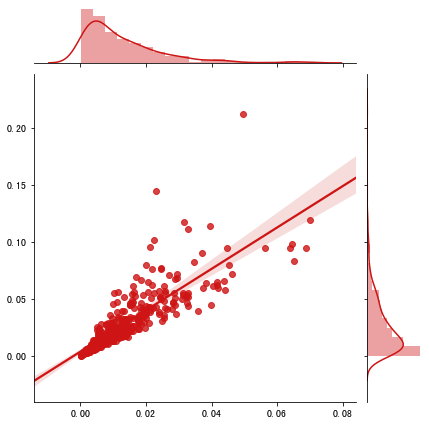

In [39]:
sns.jointplot(error1, relative_error1, kind="regg", color="#ce1414")

In [25]:
df = pd.read_csv("./datasets/car_1.0.csv", encoding="utf-8")
all_features = df.columns.values
print(len(all_features))
selected_features = ['机械液压助力','手刹','直喷','北京奔驰','倒车影像系统','表显里程','高','广汽丰田','漆面修复检测','25项 易损耗部件','国五','广汽本田','国六','一汽丰田','宽','长','插电式混合动力','东风日产','新车价','最大扭矩','年检','真皮座椅','排量','使用时间','11项 调表排查','电子驻车','电子液压助力','混合喷射','轴距','钣金修复检测','东风本田','车身稳定控制']
print(len(selected_features))
drop_list = list(set(all_features).difference(set(selected_features)))
print(len(drop_list))

199
32
167


In [26]:
df = df.drop(drop_list, axis=1)
df.to_csv("./datasets/car_selected.csv", encoding="utf_8_sig", index=False)

In [5]:
df = pd.read_csv("./datasets/car_selected.csv", encoding="utf-8")
X = df.iloc[:, :]
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, train_size=0.8, random_state=0)

In [6]:
model = XGBRegressor()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
print(mean_absolute_error(Y_train, Y_train_pred))

Y_test_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_test_pred))

0.005974227207116626
0.0489105241419163


In [13]:
xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

params =  {'n_estimators': [200, 400, 600, 800, 1000]}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'n_estimators': 600}


In [14]:
xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=600,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

params = {'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'max_depth': 3, 'min_child_weight': 3}


In [15]:
xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=600,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

params = {'gamma':[i/10.0 for i in range(0,5)]}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'gamma': 0.0}


In [16]:
xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=600,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

params = {'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'colsample_bytree': 0.9, 'subsample': 0.7}


In [17]:
xgb = XGBRegressor(
 learning_rate =0.1,
 n_estimators=600,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.9,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

params = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'reg_alpha': 1e-05}


In [23]:
xgb = XGBRegressor(
 learning_rate =0.05,
 n_estimators=600,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.9,
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 reg_alpha=1e-5)

params =  {'n_estimators': [1000, 1200, 1400, 1600, 1800, 2000]}
clf = GridSearchCV(xgb, param_grid=params, cv = 5, n_jobs=4)
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'n_estimators': 1600}


In [7]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, train_size=0.8, random_state=0)
model = XGBRegressor(
 learning_rate =0.05,
 n_estimators=1600,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.9,
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 reg_alpha=1e-5)

model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
print(mean_absolute_error(Y_train, Y_train_pred))

Y_test_pred = model.predict(X_test)
print(mean_absolute_error(Y_test, Y_test_pred))

0.01877638699348868
0.04739971234111629


In [28]:
error2 = np.abs(Y_test.values - Y_test_pred)
relative_error2 = error2 / Y_test.values

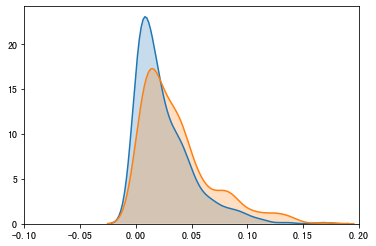

In [34]:
sns.kdeplot(error1, shade=True)
sns.kdeplot(error2, shade=True)
plt.xlim(-0.1, 0.2)
plt.show()

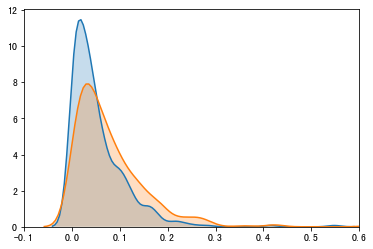

In [35]:
sns.kdeplot(relative_error1, shade=True)
sns.kdeplot(relative_error2, shade=True)
plt.xlim(-0.1, 0.6)
plt.show()